In [33]:
%matplotlib notebook

In [34]:
import psycopg2
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from sqlalchemy import create_engine

In [35]:
# Necessary Postgres login information
connection_string = "postgres:postgres@localhost:5432/2017_StreamingDB"
# Create the connection
engine = create_engine(f'postgresql://{connection_string}')

In [36]:
US_df = pd.read_sql_query('''SELECT *  FROM top_spotify WHERE region = 'us';''', engine)


# groupby artist and track then stream count
US = US_df.groupby(['artist','track'])['streams'].sum().reset_index()
# sort descending order on stream count
US = US.sort_values(['streams'], ascending=False)
US['ranking'] = range(1, 1+len(US))
# create index to value to find top 10, and delete the rest
US = pd.DataFrame(US)
US = US[(US['ranking'] <11)]
US.set_index(('ranking'), inplace=True)

US

,artist,track,streams
ranking,,,
1,Kendrick Lamar,HUMBLE.,339677217
2,Lil Uzi Vert,XO TOUR Llif3,316206696
3,Post Malone,Congratulations,285451131
4,Ed Sheeran,Shape of You,282319891
5,Future,Mask Off,241828211
6,Post Malone,rockstar,238013267
7,Luis Fonsi,Despacito - Remix,235012075
8,KYLE,iSpy (feat. Lil Yachty),227087919
9,Khalid,Location,226224851


In [37]:
print(US.streams.values.tolist())
print(US.index.values.tolist())
print(US['track'].values + ' by ' + US['artist'].values.tolist())

[339677217, 316206696, 285451131, 282319891, 241828211, 238013267, 235012075, 227087919, 226224851, 221788327]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['HUMBLE. by Kendrick Lamar' 'XO TOUR Llif3 by Lil Uzi Vert'
 'Congratulations by Post Malone' 'Shape of You by Ed Sheeran'
 'Mask Off by Future' 'rockstar by Post Malone'
 'Despacito - Remix by Luis Fonsi' 'iSpy (feat. Lil Yachty) by KYLE'
 'Location by Khalid' '1-800-273-8255 by Logic']


In [38]:
Song = ['Kendrick Lamar - HUMBLE.', 'Lil Uzi Vert - XO TOUR Llif3', 'Post Malone - Congratulations', 'Ed Sheeran - Shape of You', 'Future - Mask Off', 'Post Malone - rockstar', 'Luis Fonsi - Despacito - Remix', 'KYLE - iSpy (feat. Lil Yachty)', 'Khalid - Location', 'Logic - 1-800-273-8255']
Streams = [339677217, 316206696, 285451131, 282319891, 241828211, 238013267, 235012075, 227087919, 226224851, 221788327]
x_axis = np.arange(len(Streams))

<IPython.core.display.Javascript object>


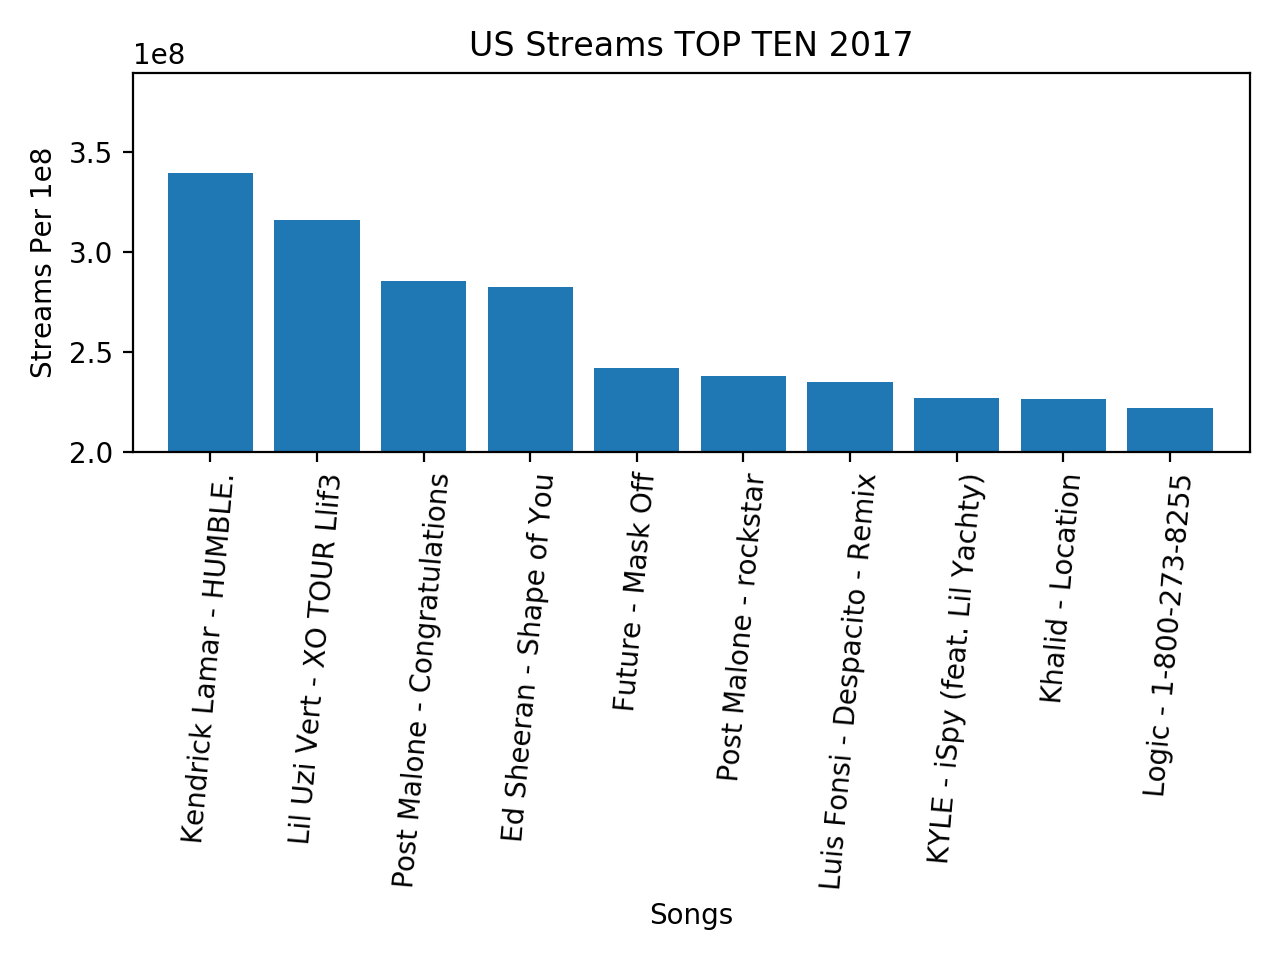

(200000000, 389677217)

In [39]:
plt.bar(Song, Streams, align="center")
rcParams.update({'figure.autolayout': True})


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Song , size=10, rotation=85)
plt.xlim(-0.725, len(x_axis)-0.25)
plt.ylim(200000000, max(Streams)+50000000)

In [40]:
plt.title("US Streams TOP TEN 2017")
plt.xlabel("Songs")
plt.ylabel("Streams Per 1e8")
plt.savefig("Images/US_Spotify_TopTen.png")
plt.show()